# Plot Simulation Results

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
yields = pd.read_hdf('/tf/primo/data/simulation/extended_targets/callie_janelle.h5')
dists = pd.read_hdf('/tf/primo/data/extended_targets/query_target_dists.h5')

In [25]:
df = yields.join(dists['callie_janelle'].rename('euclidean_distance'))

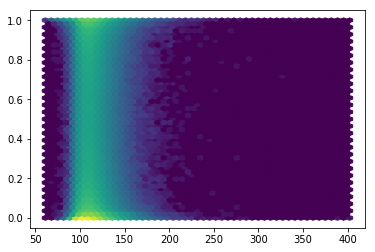

In [26]:
plt.hexbin(df.euclidean_distance, df.duplex_yield, gridsize=50, bins='log')

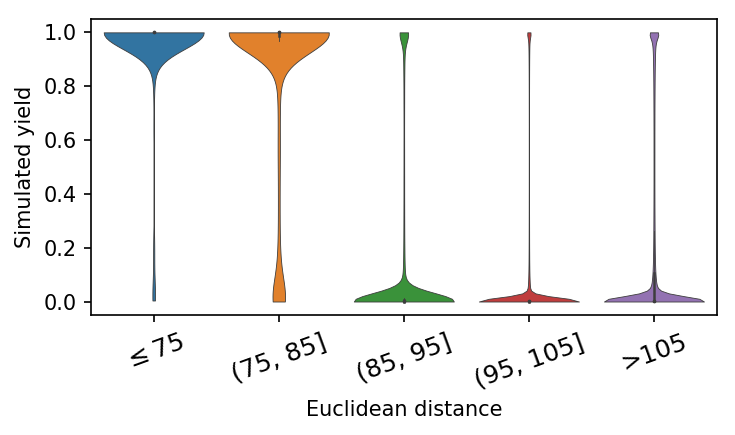

In [317]:
thresholds = [75, 85, 95, 105]
bin_labels = np.array(
    ["$\leq%d$" % thresholds[0]]
    + ["(%d, %d]" % (a,b) for (a,b) in zip(thresholds,thresholds[1:])]
    + [">%d" % thresholds[-1]]
)

plt.figure(figsize = (5, 3), dpi=150)
(lambda data:
    sns.violinplot(

        x='dist_bin',
        y='duplex_yield',
        data=data,
        linewidth=0.4,
        fliersize=0.5,
        cut=0.0,
        scale='width',
        order = bin_labels
    )
)(
    df
    .assign(
        dist_bin = lambda df: bin_labels[np.digitize(df.euclidean_distance, thresholds, right=True)]
    )
)
plt.xlabel("Euclidean distance")
plt.xticks(rotation=20)
[label.set_fontsize(12) for label in plt.gca().get_xticklabels()]
plt.ylabel("Simulated yield")
plt.tight_layout()

In [172]:
def nn_recall(scores, distances, k=10, n_thresholds=500, thresholds=None):
    
    if thresholds is None:
        thresholds = np.linspace(scores.min(), scores.max(), n_thresholds)
        thresholds[0] = (thresholds[0] + thresholds[1])/2
        
    retrieved = scores >= thresholds.reshape(-1,1)
    p_retrieved = retrieved.mean(1)
    
    neighbors = distances.argsort()[:k]
    
    nn_recall = retrieved[:, neighbors].mean(1)
    
    return nn_recall, p_retrieved, thresholds

def nn_recall_discrete(scores, distances, k=100, n_thresholds=500):
    thresholds = np.unique(np.logspace(0, np.log10(scores.max()), n_thresholds).astype(int))
    
    retrieved = scores >= thresholds.reshape(-1,1)
    p_retrieved = retrieved.mean(1)
    
    neighbors = distances.argsort()[:k]
    
    nn_recall = retrieved[:, neighbors].mean(1)
    
    return nn_recall, p_retrieved, thresholds

def plot_baselines(nn_k, n_targets, plt_fn = lambda ax: ax.loglog):
    def plot(ax):
        ax_plot = plt_fn(ax)
        unif = np.linspace(0,1,100)
        ax_plot(unif, unif, alpha=0.2, ls='--', color='black', label='Chance')
        ax_plot(unif, unif * nn_k/n_targets, alpha=0.2, ls='-.', color='black', label='Oracle')
    return plot

In [252]:
n,p,t = nn_recall(
    df.duplex_yield.values/df.duplex_yield.max(),
    df.euclidean_distance.values,
    k=100,
    thresholds=1-np.logspace(-14, 0, 100)
)

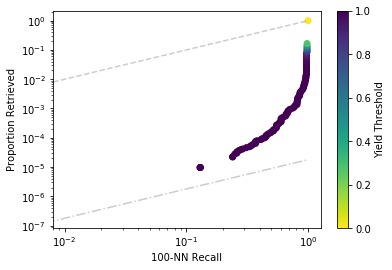

In [253]:
plt.scatter(n,p,c=t, cmap=plt.cm.viridis_r)
plot_baselines(100, len(df))(plt.gca())
plt.xlabel("100-NN Recall")
plt.ylabel("Proportion Retrieved")
plt.colorbar(label="Yield Threshold")

In [254]:
list(t)

[0.99999999999999,
 0.9999999999999861,
 0.9999999999999808,
 0.9999999999999735,
 0.9999999999999633,
 0.999999999999949,
 0.9999999999999295,
 0.9999999999999023,
 0.9999999999998647,
 0.9999999999998126,
 0.9999999999997405,
 0.9999999999996406,
 0.9999999999995023,
 0.9999999999993108,
 0.9999999999990454,
 0.9999999999986781,
 0.9999999999981692,
 0.9999999999974646,
 0.9999999999964888,
 0.9999999999951374,
 0.9999999999932658,
 0.999999999990674,
 0.9999999999870846,
 0.9999999999821135,
 0.9999999999752293,
 0.9999999999656953,
 0.9999999999524919,
 0.9999999999342066,
 0.9999999999088838,
 0.9999999998738143,
 0.9999999998252471,
 0.9999999997579871,
 0.9999999996648398,
 0.9999999995358411,
 0.9999999993571926,
 0.9999999991097849,
 0.9999999987671533,
 0.9999999982926474,
 0.9999999976355106,
 0.9999999967254508,
 0.9999999954651215,
 0.9999999937197086,
 0.9999999913025099,
 0.9999999879549646,
 0.9999999833189946,
 0.999999976898703,
 0.9999999680073286,
 0.999999955693785

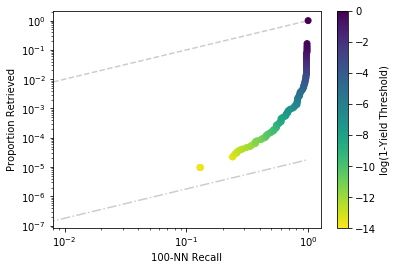

In [255]:
plt.scatter(n,p,c=np.log10(1-t), cmap=plt.cm.viridis_r)
plot_baselines(100, len(df))(plt.gca())
plt.xlabel("100-NN Recall")
plt.ylabel("Proportion Retrieved")
plt.colorbar(label="log(1-Yield Threshold)")

In [256]:
np.log10(1-t)

array([-14.00034726, -13.85767976, -13.71654367, -13.57619187,
       -13.43476178, -13.29277708, -13.15181604, -13.0101071 ,
       -12.86858606, -12.72721733, -12.58593106, -12.44444707,
       -12.30302103, -12.16163806, -12.02019233, -11.87878742,
       -11.73736911, -11.59595072, -11.4545455 , -11.31313549,
       -11.171716  , -11.03030531, -10.88889058, -10.74747536,
       -10.606061  , -10.46464675, -10.32323226, -10.18181786,
       -10.04040428,  -9.89898976,  -9.75757566,  -9.61616157,
        -9.47474752,  -9.33333329,  -9.19191916,  -9.05050503,
        -8.90909092,  -8.76767678,  -8.62626263,  -8.48484848,
        -8.34343435,  -8.20202021,  -8.06060606,  -7.91919192,
        -7.77777778,  -7.63636364,  -7.49494949,  -7.35353535,
        -7.21212121,  -7.07070707,  -6.92929293,  -6.78787879,
        -6.64646465,  -6.50505051,  -6.36363636,  -6.22222222,
        -6.08080808,  -5.93939394,  -5.7979798 ,  -5.65656566,
        -5.51515152,  -5.37373737,  -5.23232323,  -5.09

In [263]:
df.sort_values('duplex_yield', ascending=False)

duplex_yield  euclidean_distance
4c75ca915ccd3a2b  1.000000e+00           63.002720
39b440615295e3bd  1.000000e+00           65.770988
5636002ee8b6c62f  1.000000e+00           94.477684
1879d1baa16cd532  1.000000e+00           75.008255
2b1f34956242cab3  1.000000e+00           73.904701
6d4755d1883faa69  1.000000e+00           74.047363
eb82b90b2e2b4fed  1.000000e+00           92.663513
86bba020dce17dd4  1.000000e+00           76.632172
e6eb0ff902547e4d  1.000000e+00           81.789513
396701ee48023539  1.000000e+00           85.146858
e38c333b3ad4ffbb  1.000000e+00           94.598053
55a57d5838f8f4de  1.000000e+00           93.759544
06da7ab9c5609bb7  1.000000e+00           93.031372
95d630cbc5f5615d  1.000000e+00          101.138336
7d1301f394c3c621  1.000000e+00           78.214066
51b1e811bed9862f  1.000000e+00           83.042015
64c7ef4757b2972f  1.000000e+00           77.101349
9b0e62e5dbaac770  1.000000e+00           80.437759
bea3dc3587ed4d95  1.000000e+00           83.451942
076dcbf77df84368  1.000000e+00           62.327847
fbfafb419fa4a580  1.000000e+00           77.258904
7098db5b562bc12f  1.000000e+00           76.468689
d35f5ac430e6e667  1.000000e+00           81.965446
177a85d168e95a6f  1.000000e+00           88.776093
f7d5d92e6a43d5e5  1.000000e+00           93.851479
f899a67e3ec55d8a  1.000000e+00           96.422195
f193b5f407917d1e  1.000000e+00           80.440697
867a20ecaa8794ae  1.000000e+00           73.331566
c9cbdf92dc69f043  1.000000e+00          129.786072
8f24c5fc2214be86  1.000000e+00           86.889030
...                        ...                 ...
4293e7118522eb73  2.947471e-09          108.179192
e7de2a8e92955b19  2.919532e-09          106.760078
b49e3ff499d02e4f  2.907744e-09          106.195320
e241c8f93299fa1a  2.807098e-09          105.236290
cae1129c1766e38d  2.699510e-09          107.570786
8829632094523a7a  2.622938e-09          114.924400
c9f185f1ae314031  2.602693e-09          108.813751
fee8f66580bdafd1  2.488813e-09          107.550926
ed503bae0dabd9b3  2.469151e-09          102.220840
38d99e7f5a0c046f  2.374150e-09          107.265007
eb445d257e1a4a71  2.268623e-09          104.664520
9b598fe66f5971f2  2.263232e-09          104.005486
4fc47cbc794329f9  2.252600e-09          108.677101
9b45e549e69acdcd  2.250707e-09          109.566750
006f6b8d201114f8  2.201159e-09          117.140121
0c2a94d19d798c50  2.191122e-09          105.182861
d1c32d870a465a40  2.145375e-09          104.296463
77b28ec0c3764678  2.058541e-09          111.883286
736b6535bed4dbfa  2.053541e-09          103.879982
f87f779043c4de5d  1.988288e-09          102.711136
60071c276e469d94  1.870243e-09          105.070160
940d0680382c56a4  1.849743e-09           99.890068
f4e2e1f549e2ade8  1.835796e-09          102.665894
9f6de22fc9eb88b1  1.462927e-09          109.017509
f248d707149a1be5  1.373596e-09          104.078217
c620de232df43ec9  1.271497e-09          108.747299
3926c52ee9f3e4e1  9.948847e-10          113.031693
0c232f6c3c359057  9.232810e-10          104.697884
fc8420190bbaeba0  7.635459e-10          100.345612
f1bd4de038f0a247  6.680260e-10          102.829178

[5577710 rows x 2 columns]

In [129]:
from PIL import Image

In [270]:
tops = df.sort_values('duplex_yield', ascending=False)[:100]

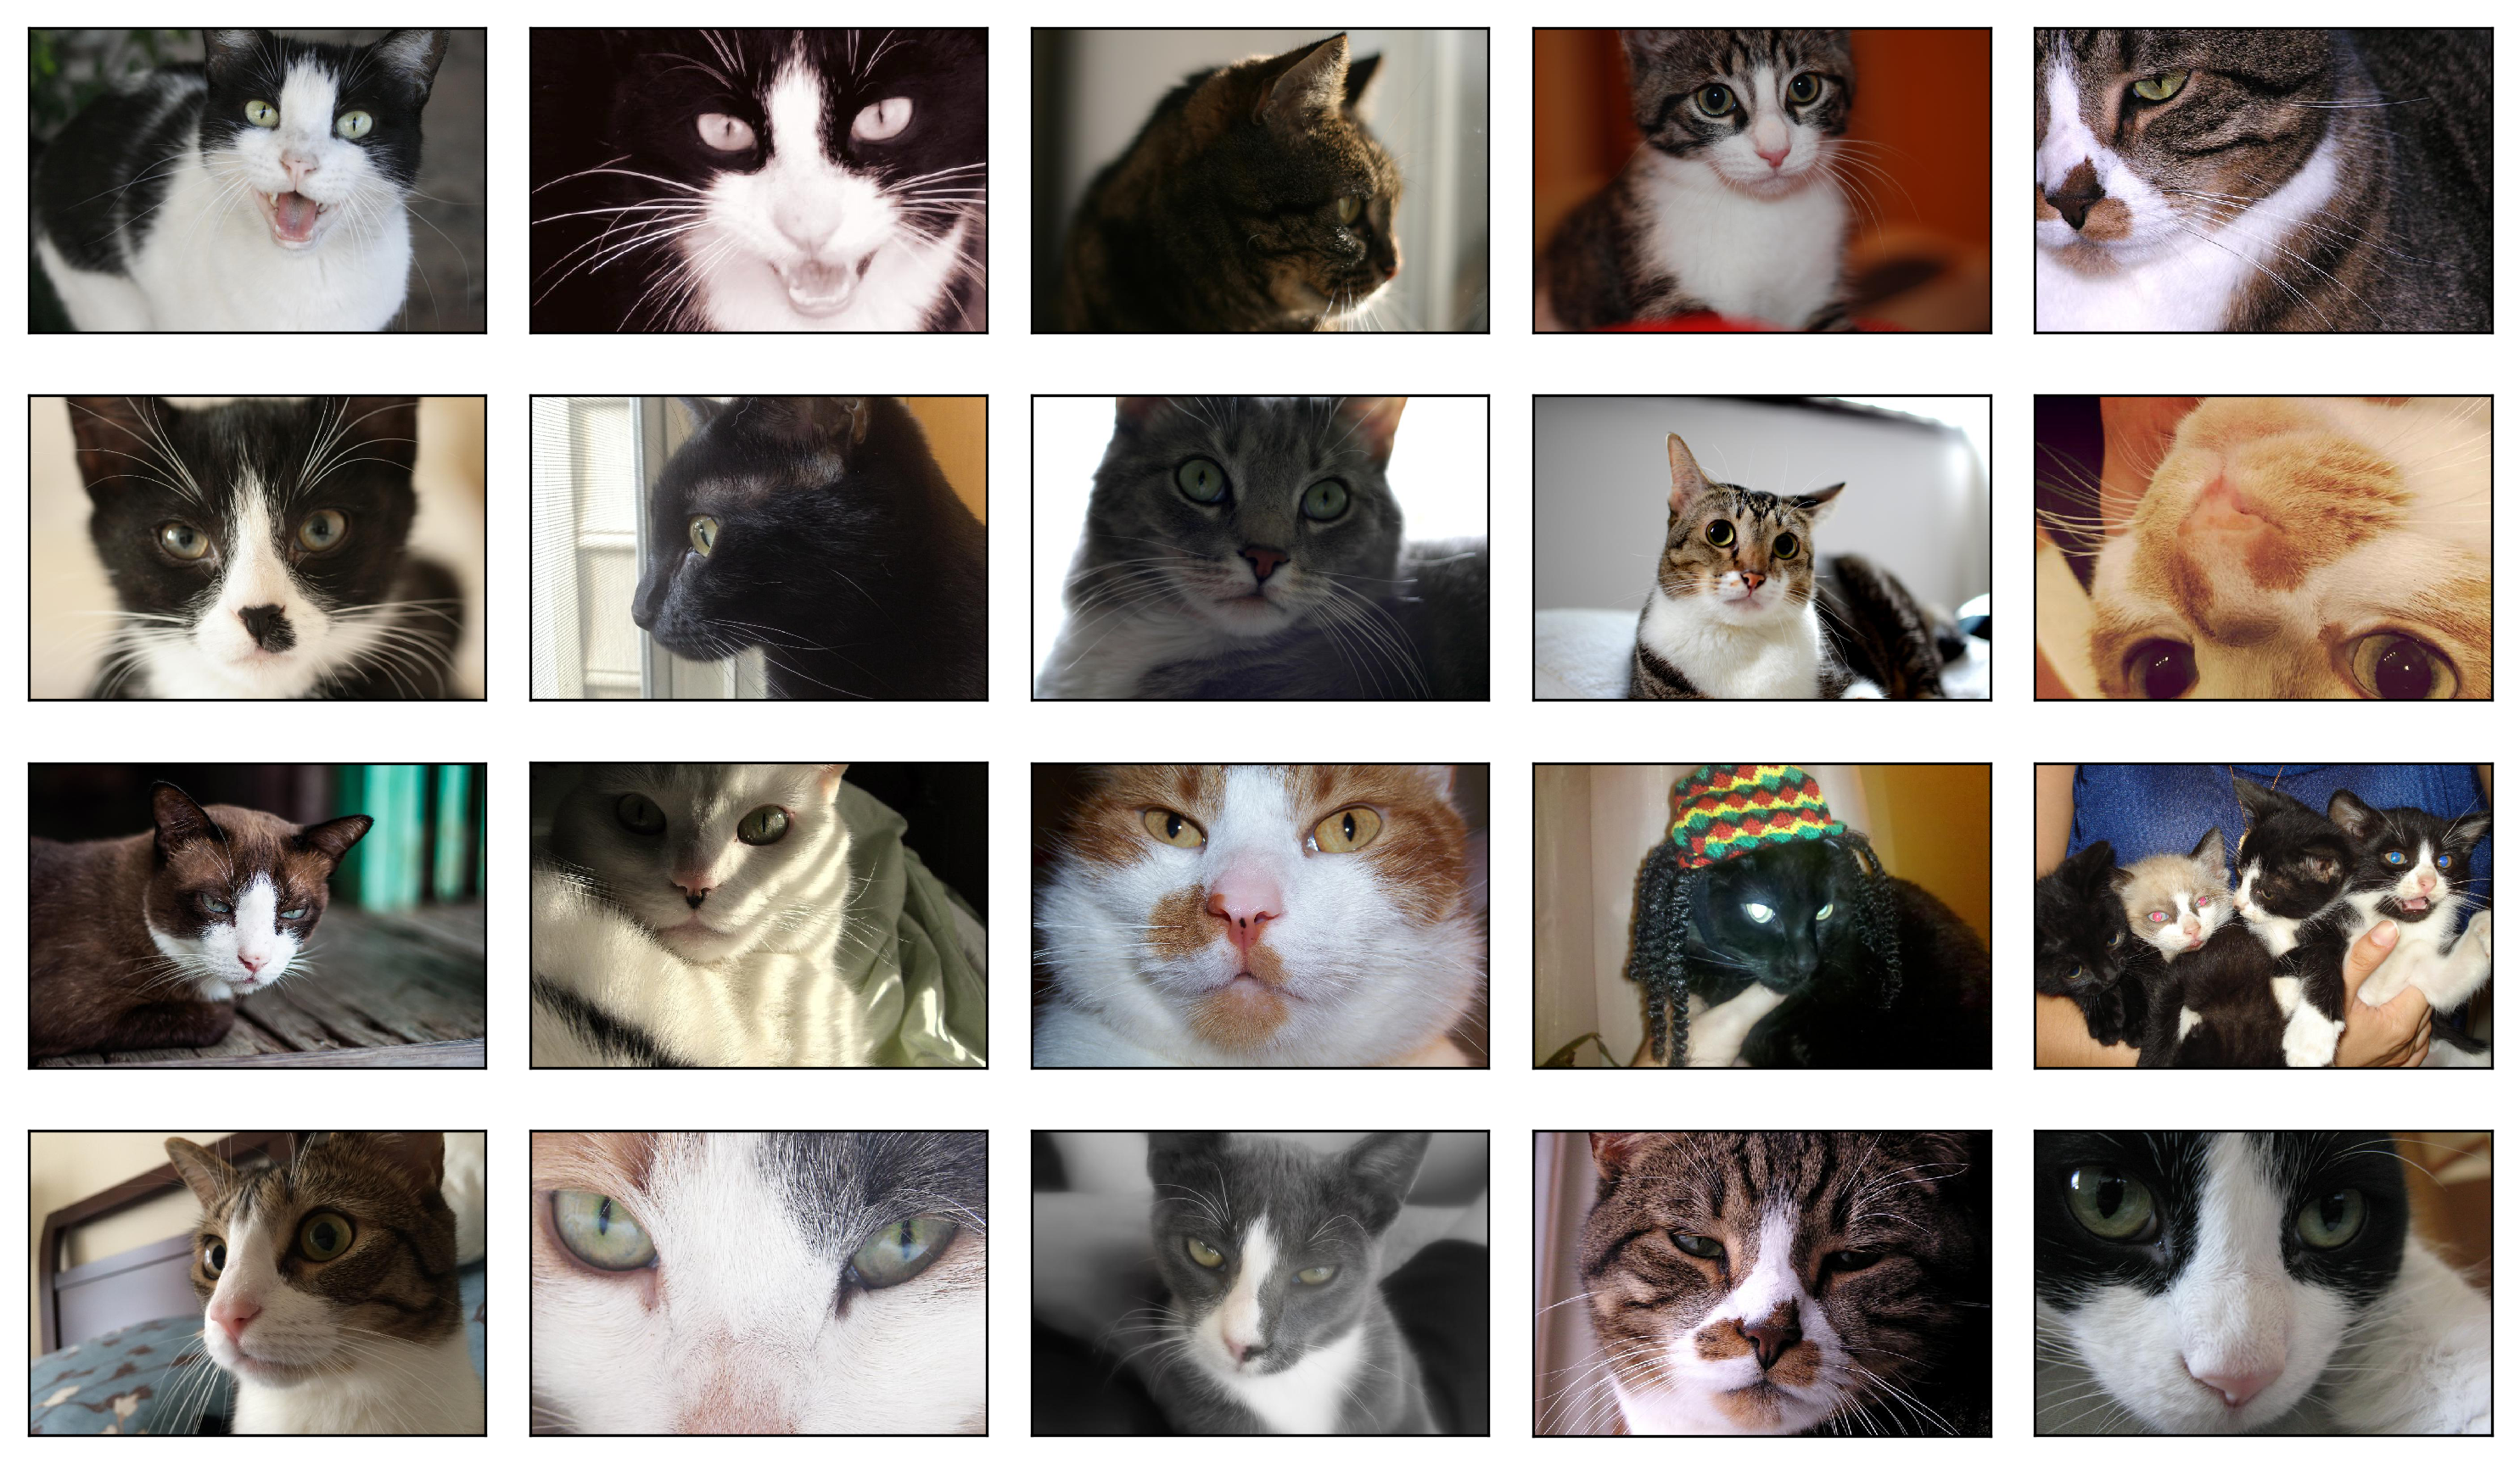

In [319]:
fig, axarr = plt.subplots(4, 5, figsize = (10,6), dpi=300)
for ix, ax in enumerate(axarr.flat):
    if ix < len(tops):
        imgid = tops.index[ix]
        img = Image.open('/tf/open_images/extended_targets/images/%s/%s.jpg' % (imgid[:2], imgid))
        new_height = img.width / 1.5
        crop = img.crop([0,img.height/2 - new_height/2,img.width,img.height/2 + new_height/2])
        ax.imshow(crop)
    ax.set_xticks(())
    ax.set_yticks(())
plt.tight_layout()
plt.savefig('/tf/primo/fig.pdf')

In [289]:
600 / 1.5

400.0